# Analysis of Foster Youth Data

## Prepare Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

### Read Data

Now let's load the foster youth data from the SPSS file. Either move your sensitive data to the `RawData/SensitiveData` folder, or change the `file_path` variable listed below to match the location of your data. This may take a few seconds. 

In [2]:
# Adjust the file path as needed
file_path = "./Data/Stata Files/FC2021v1.dta"
raw_foster_data = pd.read_stata(file_path)

### Explore Data

Before we make any modifications, let's take a quick look at the foster data.

In [3]:
# View the first few rows of the data
with pd.option_context('display.max_columns', None):
    display(raw_foster_data.head())

,fy,version,state,st,repdatyr,repdatmo,fipscode,recnumbr,sex,amiakn,asian,blkafram,hawaiipi,white,untodetm,hisorgin,clindis,mr,vishear,phydis,emotdist,othermed,everadpt,ageadopt,totalrem,numplep,manrem,phyabuse,sexabuse,neglect,aaparent,daparent,aachild,dachild,childis,chbehprb,prtsdied,prtsjail,nocope,abandmnt,relinqsh,housing,curplset,placeout,casegoal,ctkfamst,ctk1yr,ctk2yr,fosfamst,fcctk1yr,fcctk2yr,rf1amakn,rf1asian,rf1blkaa,rf1nhopi,rf1white,rf1utod,hofcctk1,rf2amakn,rf2asian,rf2blkaa,rf2nhopi,rf2white,rf2utod,hofcctk2,disreasn,ivefc,iveaa,ivaafdc,ivdchsup,xixmedcd,ssiother,noa,fcmntpay,dob,pedrevdt,rem1dt,remtrndt,dlstfcdt,latremdt,cursetdt,dodfcdt,dodtrndt,tprmomdt,tprdaddt,tprdate,latremlos,settinglos,previouslos,lifelos,ageatstart,ageatlatrem,ageatend,inatstart,inatend,entered,exited,served,iswaiting,istpr,agedout,raceethn,race,ru13,stfcid,periodstart,periodend
0,2021,1,Alabama,AL,2022,3,Fewer than 1000 cases in the County,000002184641,Male,No,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,"No, has never been legally adopted",Not applicable,1.0,2.0,Court ordered,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,"Foster home, relative",No,"Reunify with parent, principal caretaker",Married couple,1982.0,1968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Reunified with parent, primary caretaker",No,No,Yes,No,No,No,No,0.0,2007-11-15,,2021-10-01,2021-10-03,,2021-10-01,2021-11-03,2021-12-17,2021-12-17,,,,8.0,NaN,NaN,8.0,12,13,13,No,Yes,Yes,No,Yes,No,No,No,"Non-Hispanic (NH), White",White,NonMetro: Urban > 20K pop; Adjacent,AL000002184641,2020-10-01,2021-09-30
1,2021,1,Alabama,AL,2022,3,Fewer than 1000 cases in the County,000009261202,Female,No,No,No,No,Yes,No,No,Not yet determined,No,No,No,No,No,"No, has never been legally adopted",Not applicable,2.0,4.0,Court ordered,No,No,Yes,No,No,No,Yes,No,No,No,No,No,No,No,No,Institution,No,Emancipation,Single female,NaN,NaN,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable,Emancipation,No,No,No,No,Yes,No,No,0.0,2002-12-15,,2012-01-22,2021-07-16,2013-07-29,2021-07-04,2022-02-26,2022-02-28,2022-03-06,,,,92.0,NaN,554.0,646.0,17,18,18,No,Yes,Yes,No,Yes,No,No,No,"Non-Hispanic (NH), White",White,Metro: < 250K population,AL000009261202,2020-10-01,2021-09-30
2,2021,1,Alabama,AL,2022,3,Fewer than 1000 cases in the County,000040342133,Male,No,No,No,No,Yes,No,No,No,No,No,No,No,No,"No, has never been legally adopted",Not applicable,1.0,3.0,Court ordered,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,"Foster home, non-relative",No,Adoption,Single female,1988.0,NaN,Single female,1964.0,NaN,No,No,No,No,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,No,No,No,No,No,No,Yes,556.0,2011-12-15,2021-07-16,2021-04-30,2021-10-20,,2021-04-30,2022-03-18,,,,,,160.0,NaN,NaN,160.0,8,9,9,No,Yes,Yes,No,Yes,Yes,No,No,"Non-Hispanic (NH), White",White,Metro: 250K to 1 million population,AL000040342133,2020-10-01,2021-09-30
3,2021,1,Alabama,AL,2022,3,Fewer than 1000 cases in the County,000041185533,Female,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,"No, has never been legally adopted",Not applicable,1.0,1.0,Court ordered,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,"Foster home, non-relative",No,"Reunify with parent, principal caretaker",Single female,1989.0,NaN,Married couple,1984.0,1983.0,No,No,No,No,Yes,No,No,No,No,No,No,Yes,No,No,Missing,No,No,No,No,Yes,No,No,527.0,2021-09-15,2022-03-05,2021-09-19,2021-10-21,,2021-09-19,2021-09-19,,,,,,7.0,7.0,NaN,7.0,-1,0,0,No,Yes,Yes,No,Yes,No,No,No,"NH, More than One Race",More Than One Race,Metro: < 250K population,AL000041185533,2020-10-01,2021-09-30
4,2021,1,Alabama,AL,2022,3,"Jefferson, AL",000043725533,Female,No,No,Yes,No,No,No,No,Not yet determined,No,No,No,No,No,"No, has never been legally adopted",Not applicable,1.0,3.0,Court ordered,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,"Foster home, non-relative",No,"Reunify with parent, principal caretaker",Single female,1984.0,NaN,Single female,1964.0,NaN,No,No,Yes,

### Filter and Transform Data

Now, we'll filter the data to include only individuals who were in foster care at the end of the administrative year. We'll also simplify the race categories and select only the relevant columns.

In [4]:
# Filter and transform the data
foster_data = raw_foster_data[raw_foster_data['inatend'] == 'Yes'].copy()
foster_data['race'] = foster_data['raceethn'].map({
    'Hispanic (Any Race)': 'Hispanic',
    'Non-Hispanic (NH), White': 'white',
    'NH, Black': 'Black',
    'NH, Am Ind AK Native': 'Indigenous',
    'NH, Asian': 'Asian',
    'NH, Hawaiian / Other Pac Islander': 'Pacific',
    'NH, More than One Race': 'Multi',
    'Race/Ethnicity Unknown': 'Other'
})
foster_data = foster_data[['st', 'sex', 'race', 'ageatend']]
foster_data.rename(columns={'st': 'state', 'ageatend': 'age'}, inplace=True)

In [5]:
# View the first few rows of the transformed data
display(foster_data.head())

,state,sex,race,age
0,AL,Male,white,13
1,AL,Female,white,18
2,AL,Male,white,9
3,AL,Female,Multi,0
4,AL,Female,Black,4


## Explore Transformed Data

Now that we have transformed the data, let's take a look at the structure of the transformed data.

In [6]:
# Summary statistics for all variables in the transformed data
display(foster_data.describe(include='all'))

,state,sex,race,age
count,391641,391549,391641,391641
unique,52,2,8,32
top,CA,Male,white,1
freq,47871,200229,168454,33382


In [7]:
# Structure of the transformed data
display(foster_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 391641 entries, 0 to 606186
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   state   391641 non-null  object  
 1   sex     391549 non-null  category
 2   race    391641 non-null  category
 3   age     391641 non-null  category
dtypes: category(3), object(1)
memory usage: 7.1+ MB


None

In [8]:
# Display the number of missing values in each column. Are all 'null' values captured in this summary?
display(foster_data.isnull().sum())

state     0
sex      92
race      0
age       0
dtype: int64

### Distribution of Sex

Let's examine the distribution of the `sex` variable in the dataset.

In [9]:
# Table of sex distribution
print(foster_data['sex'].value_counts())

sex
Male      200229
Female    191320
Name: count, dtype: int64


### Distribution of Race

Next, we'll look at the distribution of the `race` variable.

In [10]:
# Table of race distribution
print(foster_data['race'].value_counts())

race
white         168454
Black          86827
Hispanic       85244
Multi          30612
Indigenous      9402
Other           8089
Asian           2026
Pacific          987
Name: count, dtype: int64


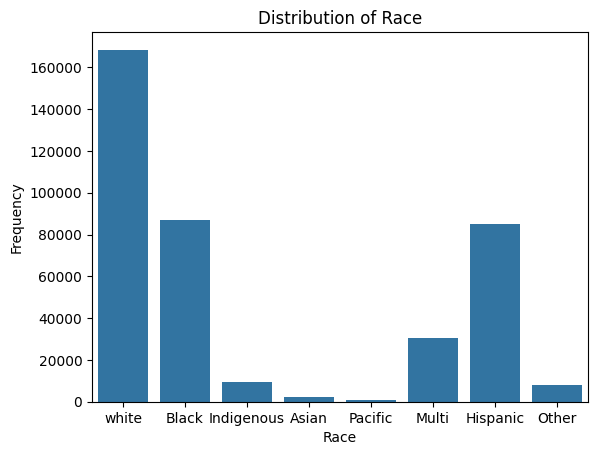

In [11]:
# Plot of race distribution
sns.countplot(x='race', data=foster_data)
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

## Question 1: How many 16-year-olds were in foster care at the end of the administrative year?

In this section, you'll write code to determine how many 16-year-olds were in foster care at the end of the administrative year. Use the `foster_data` DataFrame that we created earlier and any other resources you want to get an answer. 

In [12]:
# Write your code here
 
count_16_year_olds = foster_data[foster_data['age'] == 16].shape[0]
print(f"Number of 16-year-olds in foster care at the end of the administrative year: {count_16_year_olds}")


Number of 16-year-olds in foster care at the end of the administrative year: 20304


### Optional Exercise: State Distribution

**This exercise is optional and should be completed only if time permits.**

Create a bar plot showing the distribution of the number of children in foster care across different states. What do you observe about the distribution? Are there any states with particularly high or low numbers of children in foster care?

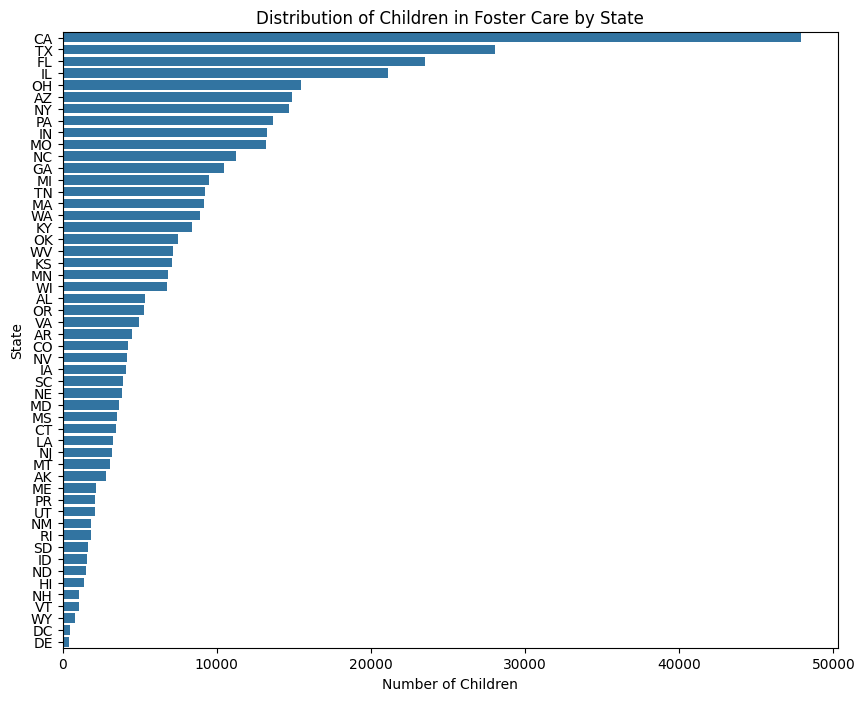

In [13]:
plt.figure(figsize=(10, 8))
sns.countplot(y='state', data=foster_data, order = foster_data['state'].value_counts().index)
plt.title('Distribution of Children in Foster Care by State')
plt.xlabel('Number of Children')
plt.ylabel('State')
plt.show()


## Question 2: Are summary statistics consistent with public reports?

In this exercise, you will compare summary statistics from the individual-level dataset we've been working with to the aggregate data available publicly. 

**Instructions:**
1. Choose a state from the individual-level dataset (`foster_data`).
2. Calculate one of the following summary statistics for your chosen state:
   - Total number of children in foster care.
   - Total number of male and female children in foster care.
   - Total number of children in foster care, broken down by race.
   - Total number of children in foster care, broken down by age.
3. Visit the [Children's Bureau website](https://www.acf.hhs.gov/cb/research-data-technology/statistics-research/afcars) and find the corresponding aggregate data for the same state and summary statistic.
4. Compare the summary statistic you calculated from the individual-level data to the aggregate data from the website. Are they the same? If not, discuss possible reasons for any discrepancies.

In [14]:
state = 'CA'
total_children = foster_data[foster_data['state'] == state].shape[0]
print(f"Total number of children in foster care in {state}: {total_children}")


Total number of children in foster care in CA: 47871


## Question #3: Which states provide foster care support past the 18th birthday?

In this section, we'll investigate which states provide foster care support past the age of 18. We'll start by examining the distribution of ages in foster care for each state.


### Initial Exploration

First, let's look at the distribution of ages in foster care across all states.

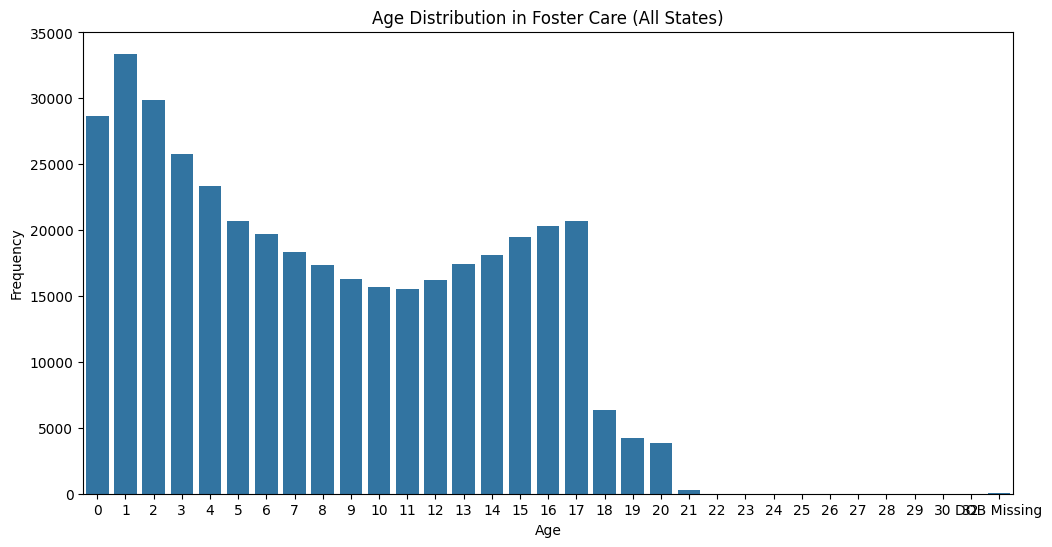

In [15]:
# Plot of age distribution across all states
plt.figure(figsize=(12, 6))  # Increase figure size
sns.countplot(x='age', data=foster_data)
plt.title('Age Distribution in Foster Care (All States)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Question #3.1: State-Specific Age Distribution

Choose a state and create a histogram showing the age distribution of children in foster care for that state. What do you observe about the distribution, especially for ages 18 and above?

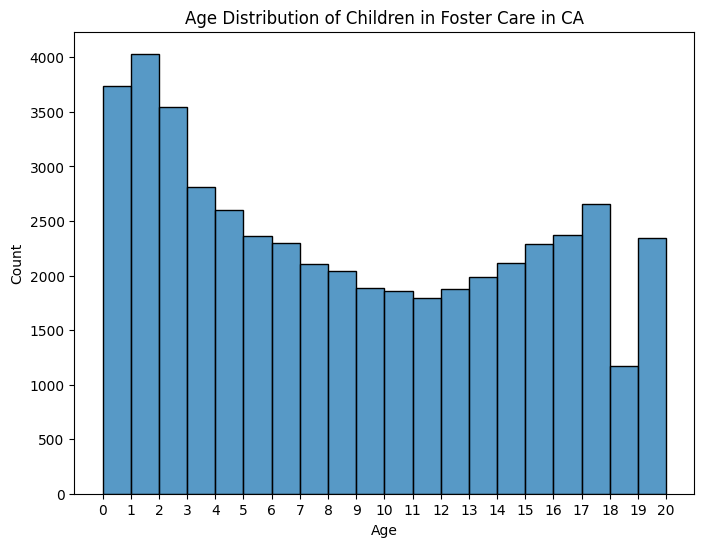

In [16]:
foster_data['numeric_age'] = pd.to_numeric(foster_data['age'], errors='coerce')
state_data = foster_data[(foster_data['state'] == 'CA') & (~foster_data['numeric_age'].isna())]

plt.figure(figsize=(8, 6))
sns.histplot(state_data['numeric_age'], bins=range(0, 21), kde=False)
plt.title(f'Age Distribution of Children in Foster Care in CA')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(range(0, 21))
plt.show()


### Question #3.2: Proportion of 18+ in Foster Care

Calculate the proportion of individuals in foster care who are 18 years or older for each state. Which states have the highest proportions?

In [17]:
# Convert age from categorical to numerical
foster_data['numeric_age'] = pd.to_numeric(foster_data['age'], errors='coerce')

# Filter to remove NAs and outliers
clean_foster_age_data = foster_data[(~foster_data['numeric_age'].isna()) & (foster_data['numeric_age'] <= 20)]

In [18]:

age_18_plus = foster_data[foster_data['numeric_age'] >= 18].groupby('state').size() / foster_data.groupby('state').size()
age_18_plus = age_18_plus.reset_index(name='proportion_18_plus').sort_values(by='proportion_18_plus', ascending=False)

 
display(age_18_plus.head())  


,state,proportion_18_plus
46,VA,0.164356
6,CT,0.154817
48,WA,0.109624
5,CO,0.090160
3,AZ,0.080390


In [19]:
# Sort by proportion in descending order
age_18_plus = age_18_plus.sort_values(by='proportion_18_plus', ascending=False)

# Display the result

display(age_18_plus)

,state,proportion_18_plus
46,VA,0.164356
6,CT,0.154817
48,WA,0.109624
5,CO,0.090160
3,AZ,0.080390
14,IL,0.077065
11,HI,0.075458
29,NE,0.075098
4,CA,0.073406
35,OH,0.058191


### Optional Exercise: Visualizing Extended Support

**This exercise is optional and should be completed only if time permits.**

Create a bar plot showing the proportion of individuals in foster care who are 18 years or older for each state. What does this tell you about the availability of extended foster care support?

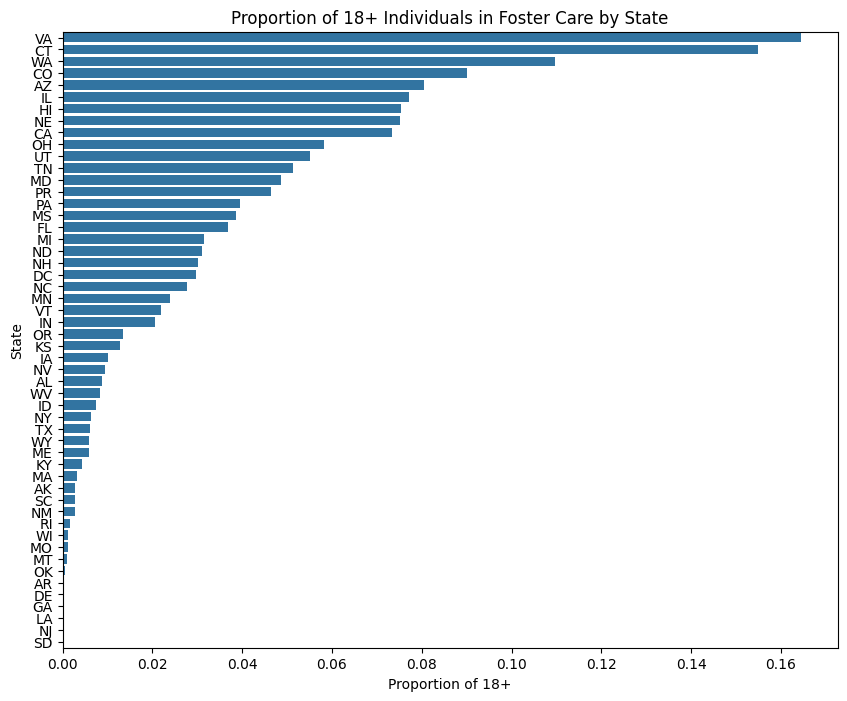

In [20]:
plt.figure(figsize=(10, 8))
sns.barplot(x='proportion_18_plus', y='state', data=age_18_plus, order=age_18_plus['state'])
plt.title('Proportion of 18+ Individuals in Foster Care by State')
plt.xlabel('Proportion of 18+')
plt.ylabel('State')
plt.show()
